# Agent Lab Draft

### Intro

You may have heard of "Ai agents" or "agentic Ai" before. This is a lab that introduces you to what that means and how agentic Ai applications interface with tools. 

### Agents

Agents have been around since long before LMMs started getting popular. At their core, they are a way to organize workflows, with agents acting as hubs to connect different tools together, or interact with other agents and their suites of tools. I.e. you might have one agent that handles file input/output, and another that handles data processing. You might then prompt the I/O agent to find an input dataset, it would give this to the processing agent and receive the output, and then finally it would save this output somewhere, handing it back to you. 

An agent-based framework provides an easy, standardized way to have different agents interact with each other, which can make integration of new agents easier. This also naturally allows for asynchronous workflows, where one or more agents will wait for the output of another, potentially checking its work and telling it to rerun or tweak things. There is also a clear delineation between the agent itself and the tools it is calling, whereas in a scripting environment this can be much less clear.

### AI Agents

This is where LLMs come in. One of the biggest annoyances with using these models is that you cannot trust them to be correct or to give consistent outputs. Ask an LLM to solve a differential equation, and it will return correct-sounding nonsense (as long as it hasn't seen it before). So, the idea is to package it as an agent, giving it the ability to access and use tools with well-understood and consistent outputs to answer the prompt. The more tools you hook up to the model, the more "agentic" it becomes. This shifts the issue from "how accurate is the LLM at task x?" to "how accurately can the LLM parse natural language inputs as the correct inputs to 'task x solver' and return the correct outputs?". 

Furthermore, LLMs have demonstrated some ability to perform chain-of-reasoning-type analyses, which itself already looks very similar to an agentic workflow. This might indicate that this could be a natural way to extend their for complex problem solving.

As of now though, the real advantage is interoperability and reduced need for background knowledge. If someone hands you their agentic workflow and says "check this new model on dataset x", all you need to do is add the new model to the list of tools and ask the LLM "Try the new classifier on dataset x". No messing with files and stuff like that, the LLM or its tools can handle all that for you.

Strictly speaking, this has few benefits over a standard script-based environment; agents are just a tool for organization. The above paragraph can also hold for a well-structured, highly modular repository. That said, these organizational features can be useful, and seem well-suited for integration with generative Ai. For instance, a good LLM can generally grab the correct files from your project directory based on a short description. So, package it as a file handler agent and have it give the files it finds to your data analysis agent. The tradeoff is that for each task that you give to the LLM, it will sometimes be wrong. This can introduce many chances for errors over a complex workflow, or simply a random chance that something in the pipeline will break or behave unexpectedly. In principle though, because of the modularity provided by agents as models get better at generalized tasks, more and more steps can be shifted to AI-powered agents. One day that could look like not needing to do any file handling at all, just giving it some files and a model and saying "run this".

### Summary

So, in short, with agents instead of just querying an LLM and receiving a response, the LLM could itself route your query through several tools, or through an entire generated (or static, but really this is just a big tool) agentic workflow. Ideally, this would result in more accurate/reliable/predictable results. 

Also, the agentic approach is being explored as a potential avenue toward building a generalized artificial intelligence (something more like JARVIS than Clippy). The idea here is to focus on the workflow-building part and basically teach the LLM how to use/learn/integrate new tools and input. Combining this with methods like retrieval augmented generation (RAG) to improve memory and better integrate tools into the model itself, this is a very promising and exciting direction of current ML research. 

As a warning though, it is not clear in any way that this is THE way forward, and lots of tech companies are vastly overhyping the abilities of agentic Ai. This topic is very green, and none of the above ideas of improved performance have been clearly demonstrated as general principles. It isn't clear at this time what agentic Ai will and will not be good for. Right now, it can be a great workflow management tool and a way to quickly integrate tools with LLMs (See sites like n8n), and the future looks promising. 

### This Lab

You may have noticed that by this definition chatgpt, copilot, etc would be considered AI agents. That's exactly right! They have a number of plug-ins and tools integrated into them, so that makes them "agentic" to some degree. Though the versions of them we most commonly interact with don't utilize the full range of operations provided by an agentic workflow. For that, check out sites like n8n. 

The goal of this lab is to give you an idea of how this integration of tools works, and teach you how to build a basic agentic AI workflow. It will introduce you to AutoGen, a popular tool for designing custom agentic workflows, and you'll work on the interface between the LLM and the tools you give to it. 

However, first I must mention the biggest caveats with working with agentic AI: scale and current performance. Ultimately without access to large, post-chatgpt models, the LLM just isn't good enough to do things like chain-of-reasoning or decent I/O handling. Even these struggle though, requiring fairly restrictive input formatting (this also applies to agent-to-agent communication). There are compatibility layers you can add between them and things like that, or even dynamically train another network to learn correct tool use over the top of the existing structure, but this falls firmly into the "current research" category. Furthermore, having the model actually learn how to use the tools requires retraining, which isn't feasible for models of this size on our scale (this is an area of current reinforcement learning research). 

As such, we will be using a very small model as a stand-in. If you want, you could replace the functions querying it with queries to a bigger model on the cloud using API keys, and you would get better performance. Or just use a bigger model. I didn't want to ask you to download a 25GB model off the bat. We will also use simple text parsing to interface our agents. 

Cut down this far, we aren't making much use of the power of LLMs, but the structure is the same. This is essentially the simplest possible agentic AI workflow. 

# Agent setup for lab

### Copilot

Remember that copilot/similar tech is agentic too. You can think of it as a code-writing agent. So you and copilot work together to build the rest of the agents on top of how the rest of them interact

#### Get dataset

You ----prompt: get dataset----> LocalConversableAgent

LocalConversableAgent ----get dataset----> DataLoaderAgent

LocalConversableAgent: Got data!

#### Query dataset

You ----prompt: query dataset----> LocalConversableAgent

LocalConversableAgent: Describes dataset

#### Train model

This is where something actually interesting might happen if you have good models and maybe let them do I/O a bit more themselves. Describing the dataset -> picking the best type of network might be something the LLM would be better than random at.

You                   ----prompt: train----> LocalConversableAgent

LocalConversableAgent ----train---->         ModelTrainer

ModelTrainer          ----query dataset----> LocalConversableAgent

LocalConversableAgent ----description---->   ModelTrainer

ModelTrainer: Picks best model and trains it

Now you have a trained model!

### Possible changes

- Heavier use of AutoGen for linking agents together
- Emphasizing copilot use more
- Emphasize the usefulness of this for rapid prototyping

### Possible blocks to have students code

- Implementing the second conv model (via copilot)
- Implementing calling the LLM in LocalConversableAgent
- Implementing the query method in LocalConversableAgent
- Try making the text parsing more general (e.g. just needing to include 'conv' or 'linear' in the output) or more conversational/readable
    - This will still not work great with the samll model
- Have them use copilot to add features quickly
    - More models, maybe datasets, more query-like commands, etc

In [1]:
# Import necessary packages

%matplotlib inline

import matplotlib.pyplot as plt

import torch
import torchvision
import numpy as np
import tqdm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

from autogen import ConversableAgent

## Lots of stuff from Lab 3, packaged into functions

### Load data

In [2]:
# Load MNIST Dataset in Numpy
def load_mnist_data():
    # 1000 training samples where each sample feature is a greyscale image with shape (28, 28)
    # 1000 training targets where each target is an integer indicating the true digit
    mnist_train_features = np.load('mnist_train_features.npy') 
    mnist_train_targets = np.load('mnist_train_targets.npy')

    # 100 testing samples + targets
    mnist_test_features = np.load('mnist_test_features.npy')
    mnist_test_targets = np.load('mnist_test_targets.npy')

    # Print the dimensions of training sample features/targets
    #print(mnist_train_features.shape, mnist_train_targets.shape)
    # Print the dimensions of testing sample features/targets
    #print(mnist_test_features.shape, mnist_test_targets.shape)
    
    return mnist_train_features, mnist_train_targets, mnist_test_features, mnist_test_targets


def flatten_features(features):
    # Flatten the features from (28, 28) to (784,)
    return features.reshape(features.shape[0], -1)

def scale_features(features):
    scaler = StandardScaler()
    return scaler.fit_transform(features)

In [3]:
def load_dataset(dataset_name: str = ""):
    if dataset_name == "mnist":
        train_features, train_targets, test_features, test_targets = load_mnist_data()
        train_features = flatten_features(train_features)
        test_features = flatten_features(test_features)
        train_features = scale_features(train_features)
        test_features = scale_features(test_features)
        
    else:
        raise ValueError(f"Unknown dataset: {dataset_name}")
        
    # train-test split
    train_features, val_features, train_targets, val_targets = train_test_split(train_features, train_targets, test_size=0.2)
    
    return train_features, train_targets, val_features, val_targets, test_features, test_targets

#### Actually read in the data

In [4]:
mnist_train_features, mnist_train_targets, mnist_validation_features, mnist_validation_targets, mnist_test_features, mnist_test_targets = load_dataset("mnist")

In [5]:
print(f"Training features shape: {mnist_train_features.shape}")
print(f"Validation features shape: {mnist_validation_features.shape}")
print(f"Training targets shape: {mnist_train_targets.shape}")
print(f"Validation targets shape: {mnist_validation_targets.shape}")

Training features shape: (800, 784)
Validation features shape: (200, 784)
Training targets shape: (800,)
Validation targets shape: (200,)


### Define Model(s)

In [6]:
class mnistClassification(torch.nn.Module):
    
    def __init__(self, input_dim, output_dim): # Feel free to add hidden_dim as parameters here
        
        super(mnistClassification, self).__init__()
        
        #self.layerconv1 = torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=5, stride=2, padding=2)
        self.layer1 = torch.nn.Linear(input_dim, 200) # First layer
        self.layer2 = torch.nn.Linear(200, output_dim) # Second layer
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(p=0.2) # Dropout layer with 20% dropout rate
        
    def forward(self, x):
        
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = torch.nn.functional.softmax(x, dim=1)
        
        return x
    
    
# Uses convolutional layers
class mnistConvClassification(torch.nn.Module):
    
    def __init__(self, input_channels, num_classes):
        super(mnistConvClassification, self).__init__()
        
        self.input_dim = 784
        self.input_channels = input_channels
        self.height = int((self.input_dim / input_channels) ** 0.5)  # Infer height and width from input_dim
        self.width = self.height
        
        # Convolutional layers
        self.conv1 = torch.nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = torch.nn.Linear(64 * 7 * 7, 128)  # Assuming input images are 28x28
        self.fc2 = torch.nn.Linear(128, num_classes)
        
        # Activation and dropout
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(p=0.5)
        
    def forward(self, x):
        
        # Reshape the input to match the expected dimensions for Conv2d
        x = x.view(-1, self.input_channels, self.height, self.width)
        
        # Convolutional layers with ReLU and pooling
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        
        # Flatten the output for the fully connected layers
        x = x.view(x.size(0), -1)
        
        # Fully connected layers with ReLU and dropout
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        
        return torch.nn.functional.softmax(x, dim=1)

### Train Model

In [7]:
def train_model(model, train_features, train_targets, validation_features, validation_targets, 
                test_features=None, test_targets=None, learning_rate=0.0015, epochs=80, batch_size=64):
    """
    Train a neural network model on the provided data.
    
    Parameters:
        model: PyTorch model to train
        train_features: Training features as numpy array
        train_targets: Training targets as numpy array
        validation_features: Validation features as numpy array
        validation_targets: Validation targets as numpy array
        test_features: Test features as numpy array (optional)
        test_targets: Test targets as numpy array (optional)
        learning_rate: Learning rate for optimizer
        epochs: Number of training epochs
        batch_size: Batch size for training
        
    Returns:
        tuple: (trained model, training loss list, validation accuracy list)
    """
    # Initialize tracking lists
    train_loss_list = np.zeros(epochs)
    validation_accuracy_list = np.zeros(epochs)
    
    # Convert numpy arrays to PyTorch tensors
    train_inputs = torch.from_numpy(train_features).float()
    train_targets = torch.from_numpy(train_targets).long()
    
    validation_inputs = torch.from_numpy(validation_features).float()
    validation_targets = torch.from_numpy(validation_targets).long()
    
    if test_features is not None and test_targets is not None:
        test_inputs = torch.from_numpy(test_features).float()
        test_targets = torch.from_numpy(test_targets).long()
        test_dataset = TensorDataset(test_inputs, test_targets)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Create dataloaders
    train_dataset = TensorDataset(train_inputs, train_targets)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    validation_dataset = TensorDataset(validation_inputs, validation_targets)
    validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
    
    # Setup optimizer and scheduler
    loss_func = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
    
    # Move model to GPU if available
    if torch.cuda.is_available():
        model = model.cuda()
        train_inputs = train_inputs.cuda()
        validation_inputs = validation_inputs.cuda()
        validation_targets = validation_targets.cuda()
    
    # Training Loop
    for epoch in tqdm.trange(epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        
        for batch_inputs, batch_targets in train_loader:
            if torch.cuda.is_available():
                batch_inputs, batch_targets = batch_inputs.cuda(), batch_targets.cuda()
            
            optimizer.zero_grad()  # Reset gradients to zero
            outputs = model(batch_inputs)  # Forward pass with current batch
            loss = loss_func(outputs, batch_targets)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights
            
            running_loss += loss.item() * batch_inputs.size(0)
        
        # Store average epoch loss
        train_loss_list[epoch] = running_loss / len(train_dataset)
        scheduler.step()  # Update learning rate with cosine annealing
        
        # Compute Validation Accuracy
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            correct = 0
            total = 0
            for val_inputs, val_targets in validation_loader:
                if torch.cuda.is_available():
                    val_inputs, val_targets = val_inputs.cuda(), val_targets.cuda()
                outputs = model(val_inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += val_targets.size(0)
                correct += (predicted == val_targets).sum().item()
            
            validation_accuracy_list[epoch] = correct / total
    
    # Compute test accuracy if test data is provided
    test_accuracy = None
    if test_features is not None and test_targets is not None:
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for test_inputs, test_targets in test_loader:
                if torch.cuda.is_available():
                    test_inputs, test_targets = test_inputs.cuda(), test_targets.cuda()
                outputs = model(test_inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += test_targets.size(0)
                correct += (predicted == test_targets).sum().item()
            
            test_accuracy = correct / total
    
    return model, train_loss_list, validation_accuracy_list, test_accuracy

### Visualize and Evaluate Model

In [8]:
def visualize_training(train_loss_list, validation_accuracy_list):
    """
    Visualize training loss and validation accuracy.
    
    Parameters:
        train_loss_list: List of training losses
        validation_accuracy_list: List of validation accuracies
    """
    plt.figure(figsize = (12, 6))

    # Visualize training loss with respect to iterations (1 iteration -> single batch)
    plt.subplot(2, 1, 1)
    plt.plot(train_loss_list, linewidth = 3)
    plt.ylabel("training loss")
    plt.xlabel("epochs")
    sns.despine()

    # Visualize validation accuracy with respect to epochs
    plt.subplot(2, 1, 2)
    plt.plot(validation_accuracy_list, linewidth = 3, color = 'gold')
    plt.ylabel("validation accuracy")
    sns.despine()



100%|██████████| 80/80 [00:01<00:00, 41.29it/s]


Test Accuracy: 0.7700


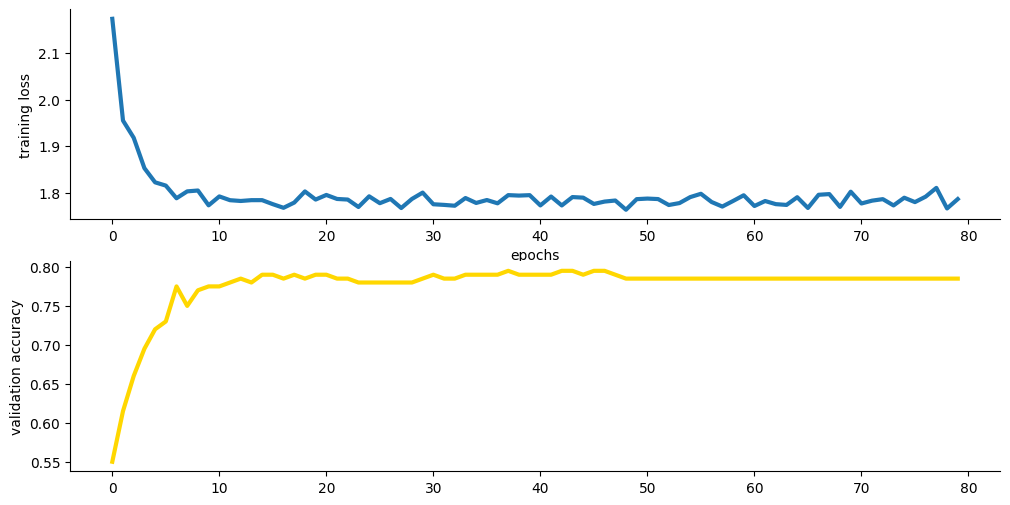

In [9]:
# Test that the above works
model = mnistClassification(input_dim=784, output_dim=10)
model, train_loss_list, validation_accuracy_list, test_accuracy = train_model(
    model, mnist_train_features, mnist_train_targets, mnist_validation_features, mnist_validation_targets,
    test_features=mnist_test_features, test_targets=mnist_test_targets
)
print(f"Test Accuracy: {test_accuracy:.4f}")
visualize_training(train_loss_list, validation_accuracy_list)

# Agents

In [10]:
from autogen import ConversableAgent

class DatasetLoaderAgent(ConversableAgent):
    """
    An agent that specializes in loading and preprocessing datasets.
    """
    def __init__(self, name="DatasetLoader", **kwargs):
        self.available_datasets = ["mnist"]
        system_message = (
            "I am a dataset loading assistant. I can load and preprocess various datasets for machine learning tasks. "
            f"Currently I support: {', '.join(self.available_datasets)}. "
        )
        super().__init__(name=name, system_message=system_message, **kwargs)
        
        # Store loaded datasets
        self._loaded_datasets = {}
    
    def _get_available_datasets(self):
        """Return a list of available datasets."""
        return self.available_datasets
    
    def _load_dataset(self, dataset_name):
        """
        Load and preprocess a dataset.
        
        Args:
            dataset_name (str): Name of the dataset to load
            
        Returns:
            dict: Information about the loaded dataset and the data itself
        """
        try:
            # Load the dataset using the existing function
            train_features, train_targets, val_features, val_targets, test_features, test_targets = load_dataset(dataset_name)
            
            # Store the dataset
            self._loaded_datasets[dataset_name] = {
                "train_features": train_features,
                "train_targets": train_targets,
                "validation_features": val_features,
                "validation_targets": val_targets,
                "test_features": test_features,
                "test_targets": test_targets
            }
            
            # Return information about the loaded dataset
            return {
                "status": "success",
                "dataset_name": dataset_name,
                "train_samples": train_features.shape[0],
                "validation_samples": val_features.shape[0],
                "test_samples": test_features.shape[0],
                "feature_dim": train_features.shape[1]
            }
        except Exception as e:
            return {
                "status": "error",
                "message": f"Failed to load dataset '{dataset_name}': {str(e)}"
            }
    
    def get_dataset(self, dataset_name):
        """
        Retrieve a previously loaded dataset.
        
        Args:
            dataset_name (str): Name of the dataset to retrieve
            
        Returns:
            dict: The dataset components or None if not found
        """
        return self._loaded_datasets.get(dataset_name)

In [11]:
# Interface agent
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32)
model.to("cuda" if torch.cuda.is_available() else "cpu")

# Create a simple text-generation pipeline
llm_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=150,
    do_sample=True,
    temperature=0.7,
)

# Wrapper function for the local model pipeline
def local_model_generate(prompt):
    output = llm_pipeline(prompt)[0]["generated_text"]
    return output


class LocalConversableAgent(ConversableAgent):
    def __init__(self, name, **kwargs):
        super().__init__(name, **kwargs)
        
        self.dataset_loader_agent = None
        self.model_trainer_agent = None

    def set_dataset_loader_agent(self, agent):
        """
        Set the dataset loader agent for this agent.
        
        Args:
            agent (DatasetLoaderAgent): The dataset loader agent to set.
        """
        self.dataset_loader_agent = agent
        
    def set_model_trainer_agent(self, agent):
        """
        Set the model trainer agent for this agent.
        
        Args:
            agent (ConversableAgent): The model trainer agent to set.
        """
        self.model_trainer_agent = agent
    
    def generate_reply(self, messages, sender=None, config=None):
        # Extract the latest user message
        user_message = messages[-1]["content"]
        
        # Check if the message is a "get dataset" command
        if user_message.startswith("get dataset"):
            # Extract the dataset name from the command
            # In principle, this is where you could have an LLM parse the command
            dataset_name = user_message.split("get dataset")[-1].strip()

            # Use the DatasetLoaderAgent to load the dataset
            result = self.dataset_loader_agent._load_dataset(dataset_name)

            # Check if the dataset was successfully loaded
            if result["status"] == "success":
                response_text = (
                    f"Successfully loaded dataset '{result["dataset_name"]}'.\n"
                    f"Training samples: {result['train_samples']}, "
                    f"Validation samples: {result['validation_samples']}, "
                    f"Test samples: {result['test_samples']}, "
                    f"Feature dimension: {result['feature_dim']}."
                )
            else:
                response_text = f"Failed to load dataset '{dataset_name}': {result['response']}"
        
        elif user_message.startswith("query"):
            # Extract the query from the command
            query = user_message.split("query")[-1].strip()

            # Use the DatasetLoaderAgent to retrieve the dataset
            dataset_name = query.split()[0]
            dataset = self.dataset_loader_agent.get_dataset(dataset_name)
    
            if dataset:
                # Prepare a prompt with dataset information
                prompt = (
                    f"The dataset '{dataset_name}' has been loaded. "
                    f"The first two rows of the training features are:\n"
                    f"{dataset['train_features'][:2]}.\n"
                    "Description of the dataset:\n"
                )
                # Generate a description using the local model
                response_text = local_model_generate(prompt)
            else:
                response_text = f"Dataset '{dataset_name}' is not loaded or does not exist."
                
        elif user_message.startswith("train"):
            modeltype = user_message.split("train")[-1].strip()
            
            # Use the ModelTrainerAgent to train the model
            if self.model_trainer_agent is not None:
                if modeltype in ["conv", "linear"]:
                    result = self.model_trainer_agent.train_model_on_query("mnist", "placeholder",override=modeltype)
                else:
                    # Query the local agent to describe the dataset, then do what's best from there
                    message = [{"role": "user", "content": f"query mnist"}]
                    response = self.generate_reply(message)
                    dataset_description = response["content"]
                    # Use the dataset description to decide on the model type
                    result = self.model_trainer_agent.train_model_on_query("mnist", dataset_description)
                
                if result["status"] == "success":
                    response_text = f"Successfully trained the model '{modeltype}'."
                else:
                    response_text = f"Failed to train the model '{modeltype}': {result['response']}"
            else:
                response_text = "Model trainer agent is not set."
        
        else:
            # Generate a response using the local model
            response_text = local_model_generate(user_message)
        
        # Return the response in the expected format
        return {"role": "assistant", "content": response_text}

/home/bburke/417/417venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


### Talk to the datasetloader

In [12]:
# Create instances of the agents
dataset_loader_agent = DatasetLoaderAgent(name="DatasetLoader")
local_agent = LocalConversableAgent(name="LocalAgent")
local_agent.set_dataset_loader_agent(dataset_loader_agent)

# Simulate a conversation
messages = [{"role": "user", "content": "get dataset mnist"}]

# LocalConversableAgent processes the first message
response = local_agent.generate_reply(messages)
print(response["content"])
print()

# Add a second message to the conversation
messages.append({"role": "user", "content": "query mnist"})

# LocalConversableAgent processes the second message
response = local_agent.generate_reply(messages)
print(response["content"])

# Note that this is mostly garbage because the model is tiny

Successfully loaded dataset 'mnist'.
Training samples: 800, Validation samples: 200, Test samples: 100, Feature dimension: 784.

The dataset 'mnist' has been loaded. The first two rows of the training features are:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]].
Description of the dataset:
mnist is a collection of 60,000 labeled images of handwritten digits. The images are 28x28 pixels and are stored as 8-bit integer values between 0 and 255. The goal of this project is to use deep learning to detect the digit in the training data. The dataset is small, so it is not suitable for training large models. However, it is a good starting point for investigating deep learning models for image classification.
2. Data Preprocessing
Step 1: Load the dataset
The next step is to load the dataset. Since the dataset is small, we will use the Keras function `load_data()` to load the dataset. The


In [13]:
class ModelTrainerAgent(ConversableAgent):
    """
    An agent that selects, creates, and trains a classification model based on the user's query.
    """
    def __init__(self, name="ModelTrainer", dataset_loader_agent=None, **kwargs):
        super().__init__(name=name, **kwargs)
        self.dataset_loader_agent = dataset_loader_agent
        
        self.model, self.train_loss_list, self.val_accuracy_list, self.test_accuracy = None, None, None, None
        

    def train_model_on_query(self, dataset_name, query, override=None):
        """
        Parse the query, select the model, and train it on the dataset.
        
        Args:
            query (str): The user's query containing the dataset name and model type.
            
        Returns:
            str: A response summarizing the training process and results.
        """
        try:
            response = local_model_generate(f"Analyze this description of the dataset and respond with the better model for analyzing it, either exactly 'linear' or 'conv': \n {query}")
            
            print("Analyzing response:", response)
            
            # Parse the query to extract the dataset name and model type
            parts = response.split()
            
            model_type = parts[-1].lower()

            # Retrieve the dataset from the DatasetLoaderAgent
            dataset = self.dataset_loader_agent.get_dataset(dataset_name)
            if not dataset:
                return f"Dataset '{dataset_name}' is not loaded or does not exist."

            # Extract dataset components
            train_features = dataset["train_features"]
            train_targets = dataset["train_targets"]
            val_features = dataset["validation_features"]
            val_targets = dataset["validation_targets"]
            test_features = dataset["test_features"]
            test_targets = dataset["test_targets"]

            # Select the model based on the model type
            if model_type == "linear" or override == "linear":
                model = mnistClassification(input_dim=train_features.shape[1], output_dim=10)
            elif model_type == "conv" or override == "conv":
                model = mnistConvClassification(input_channels=1, num_classes=10)
            else: # Fallback
                model = mnistConvClassification(input_channels=1, num_classes=10)

            # Train the model
            self.model, self.train_loss_list, self.val_accuracy_list, self.test_accuracy = train_model(
                model, train_features, train_targets, val_features, val_targets,
                test_features=test_features, test_targets=test_targets
            )

            # Summarize the training results
            response = (
                f"Model '{model_type}' trained successfully on dataset '{dataset_name}'.\n"
                f"Final validation accuracy: {self.val_accuracy_list[-1]:.4f}\n"
                f"Test accuracy: {self.test_accuracy:.4f}"
            )
            print("Training response:", response)
            
            result = {
                "status": "success",
                "model": model,
                "train_loss_list": self.train_loss_list,
                "val_accuracy_list": self.val_accuracy_list,
                "test_accuracy": self.test_accuracy,
                "response": response
            }
            
            return result
        
        except Exception as e:
            return {"status": "error", "response": f"An error occurred during training: {str(e)}"}

In [14]:
# Create instances of the agents
dataset_loader_agent = DatasetLoaderAgent(name="DatasetLoader")
model_trainer_agent = ModelTrainerAgent(name="ModelTrainer", dataset_loader_agent=dataset_loader_agent)
local_agent = LocalConversableAgent(name="LocalAgent")

local_agent.set_dataset_loader_agent(dataset_loader_agent)
local_agent.set_model_trainer_agent(model_trainer_agent)

# Simulate a conversation
messages = [{"role": "user", "content": "get dataset mnist"}]
response = local_agent.generate_reply(messages)
print(response["content"])

# Add a training command
messages.append({"role": "user", "content": "train random"})
response = local_agent.generate_reply(messages)
print(response["content"])

# And you now have a trained model!
print(model_trainer_agent.model)

Successfully loaded dataset 'mnist'.
Training samples: 800, Validation samples: 200, Test samples: 100, Feature dimension: 784.
Analyzing response: Analyze this description of the dataset and respond with the better model for analyzing it, either exactly 'linear' or 'conv': 
 The dataset 'mnist' has been loaded. The first two rows of the training features are:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]].
Description of the dataset:
The MNIST dataset contains 60,000 28x28 grayscale images representing handwritten digits. The training data contains 50,000 images, and the test data contains 10,000 images. Each image is between 0 and 1, with values ranging from 0 to 1. The training data is for learning and testing a deep neural network, and the test data is for evaluating the network's performance. The data was collected by the National Center for Supercomputing Applications at the University of Illinois at Urbana-Champaign.
Linear model:
The linear model is the best model for analy

100%|██████████| 80/80 [00:11<00:00,  6.82it/s]

Training response: Model 'print("' trained successfully on dataset 'mnist'.
Final validation accuracy: 0.9600
Test accuracy: 0.9600
Successfully trained the model 'random'.
mnistConvClassification(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)
